# Visualisering av Trondheim Forecast

#### Forklaring av notebookoppsett:
For en mer ryddig løsning vil hver kall av et visualiseringsmetode lagre figurene som skapes i bilder og presentere den i et rutenett på slutten. Der vil vi inkluder ekommentarer og markdowns som forklarer hver figur en og en. 

#### Import av Moduler og Klasser:

In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../src"))

from data_reader import DataLeser
from data_vizualisation import DataVisualisering, vis_alle_figurer

#### Last inn renset datasett:

In [2]:
df = DataLeser(data_dir="../data").les_csv("trondheim_forecast_cleaned.csv")

#### Initialiser visualiseringsklassen:

In [3]:
vis = DataVisualisering(df)

#### Alle metodene:

In [4]:
vis.plott_histogram("Temperatur", save=True)
vis.plott_tidserie("Temperatur", save=True)
vis.plott_trend_vs_rådata("Temperatur", vindu=7, save=True)
vis.plott_sammenheng("Temperatur", "Fuktighet", vis_outliers=True, thresh=2.0, save=True)
vis.plott_korrelasjonsmatrise(save=True)
vis.plott_pairplot(save=True)
vis.plott_jointplot("Temperatur", "Fuktighet", save=True)
vis.visualiser_manglende_verdier(save=True)
print("Alle figurer lagret!")

/Users/edigalane/kode/MiljoDataProsjekt/src/data_vizualisation.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Alle figurer lagret!


#### Alle figurer:

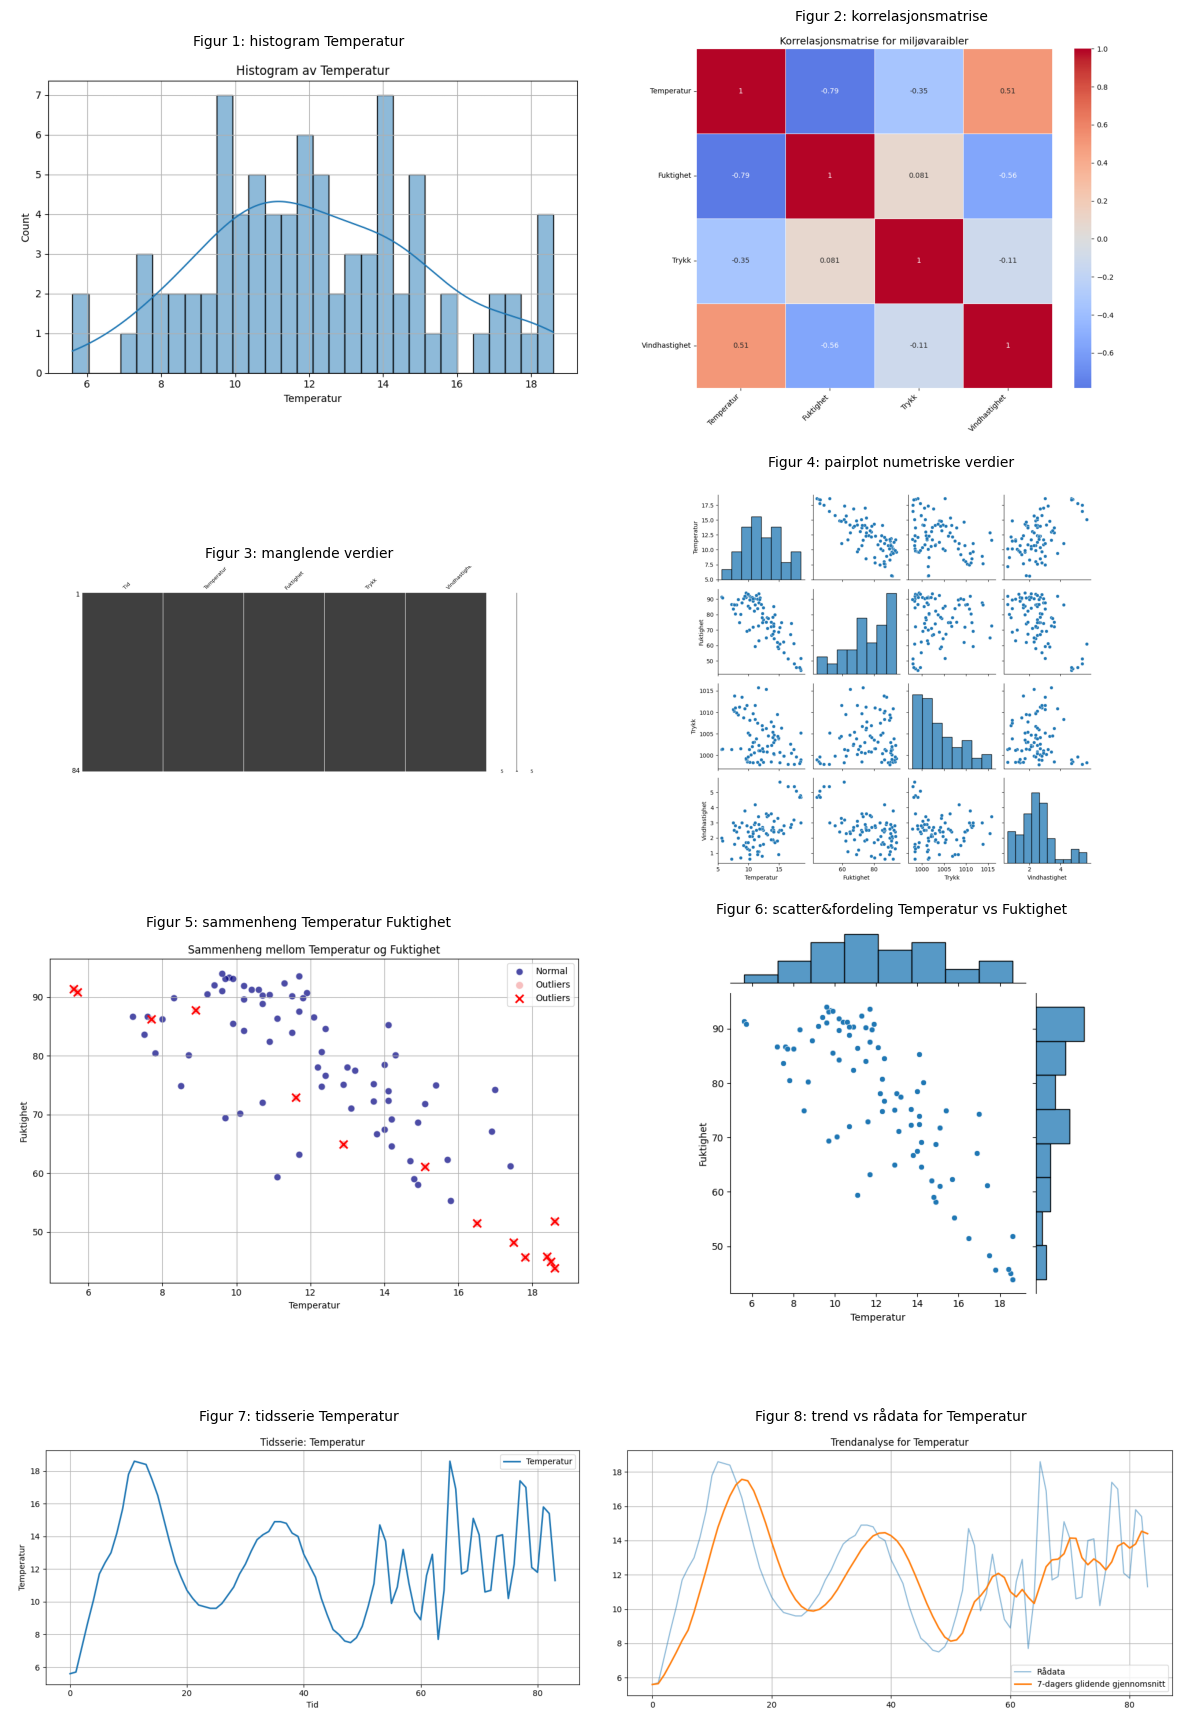

In [5]:
vis_alle_figurer()

#### Kommentarer:

- **Figur 1**: Histogram av temperatur som viser at datasettet hovedsakelig fordeler seg mellom 8 og 13 grader. Lavere temperaturer forekommer dermed oftere enn høyere. Det er enkelte høyere temperaturverdier som stikker seg ut, dette kan potensielt reflektere midlertidige varmepåvirkninger.

- **Figur 2**: Korrelasjonsmatrisen gir en visuell fremstilling av lineære sammenheng mellom de ulike variablene. Vi ser at den korrelasjonen som er sterkest er mellom temperatur og fuktighet.

- **Figur 3**: Visualiseringen av manglende verdier viser det vi allerede vet; det finnes ingen tomme felter eller fraværende observasjoner i noen av kolonnene. 

- **Figur 4**: Pairplotten gir en oversikt over sammenhengene mellom alle numeriske varaibler, semt fordelingen av hver enkelt. Forholdet mellom temperatur og fuktighet er det som trer tydelig frem her. Fordelingsplottene langs diagonalen bekrefter at varaiblene har ulike grader av spredning og tyngdepunkt. 

- **Figur 5**: Dette er en scatterplott som fokuserer på forholdet mellom temperatur og fuktighet inkludert outliers. Vi har plassert terskelen til 2.0 istedenfor 2.5 for å mer tydelig fremheve outliers. Denne viser igjen en tydelig negativ lineær trend mellom de to verdiene. 

- **Figur 6**: Jointplotten kombinerer scatter og histogram for å gi en helhetlig bilde av relasjonen mellom temperatur og fuktighet. Figuren gir i tillegg innsikt i fordelingen av begge variabler hver for seg. 

- **Figur 7**: i tidsseriegrafen av temperatur over tid obsereverer vi en bølgeformert struktur i kurven som tyder på døgnsykluser med varme på dagtid og kulde om natten. Raskere og brattere temperaturendringer antyder usikkerhet i datasettets evne til fremtidsprediksjon. 

- **Figur 8**: Figuren er en sammenligning av rådata for temperatur mot en glidende gjennomsnittstrend. Den oransje linjen viser en 7-punkts rullerende middelverdi. Vi presenteres dermed med en klarere framstilling av de underliggende langsiktige trendene i temperatursvinginger. Glidende gjennomsnitt kan vi dermed bruke for å filterer ut støy og fremheve strukturelle mønstre.


#### Konklusjon:
- Korrelasjonsmatrisen, scatterplottet mellom temperatur og fuktighet og trendgrafene formidler effektivt innsikten i datasettet til et bredere publikum. 

- Korrelasjonsmatrisen gir et raskt oversikt for korrelasjonene og de sterkeste trendene. Om brukeren kunn ønsker et raskt oversikt over alle varaiblene og deres korrelasjon så er dette det mest aktuelle metoden.

- Scatterplottet med outliers tydeligjør relasjonen mellom to variabler enda mer og gir oversikt for uteliggerene i begge kategoriene. For at denne figuren skal ha best effekt krever det et datasett med en del outliers og to variabler som henger sammen. Dersom en har sett et interesangt korrelasjon mellom to verdier fra korrelasjonsmatrisen så er det aktuelt å bruke en scatterP deretter for å dypere utforske dette.

- Til slutt viser trendgrafene for temperatur hvordan å filtrere ut støy og uregelmessigheter som kan oppstå ved ulike værforhold påvirker glathet og mønster i et variabel over tid. Trolig kan vi også se at datasettets nøyaktighet for prediksjon av fremtidige værtrender er ganske usikker. Temperaturen starter jævn og fin de første 50 radene, men blir raskt hakkete og unøyaktig.

#### 

#### Interaktiv Trend:
I tillegg har brukeren valg om å bruke en interaktiv graf for å utforske in real time endringene i et variabel som temperatur. (vi fikk denne dessverre ikke til å fungere, men forsøkte å ha en god metode)

In [6]:
import ipywidgets as widgets
widgets.IntSlider()

%matplotlib notebook

vis.interaktiv_plot_trend("Temperatur")

<IPython.core.display.Javascript object>